# Resume Predictor


*   Dataset - 1 : https://www.kaggle.com/datasets/gauravduttakiit/resume-dataset
*   Dataset - 2 : https://www.kaggle.com/datasets/m296bsy1181/resume-dataset/data?select=tiny_resume_dataset_with_stopwords.csv

# Building the Model

# **1. Importing the required libraries:**






In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Loading the desired resume dataset:**

In [47]:
# from google.colab import drive
drive.mount('/content/drive')

In [5]:
df = pd.read_csv("UpdatedResumeDataSet.csv")

In [6]:
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
1343,chef,head chef summary mature college student inter...
1344,chef,executive chef summary outgoing job title offe...
1345,chef,chef assistant core qualifications ms word adv...
1346,chef,executive chef executive profile seeking an op...


# **3. Finding existing job categories:**




In [7]:
df['Category'].value_counts()

Category
accountant                   118
banking                      115
Java Developer                84
chef                          77
Testing                       70
DevOps Engineer               55
Python Developer              48
Web Designing                 45
HR                            44
Hadoop                        42
ETL Developer                 40
Sales                         40
Mechanical Engineer           40
Operations Manager            40
Data Science                  40
Blockchain                    40
Arts                          36
Database                      33
PMO                           30
Electrical Engineering        30
Health and fitness            30
Business Analyst              28
DotNet Developer              28
business analyst              28
automation testing            26
Automation Testing            26
Network Security Engineer     25
Civil Engineer                24
SAP Developer                 24
bpo                           22
A

<Axes: xlabel='Category', ylabel='count'>

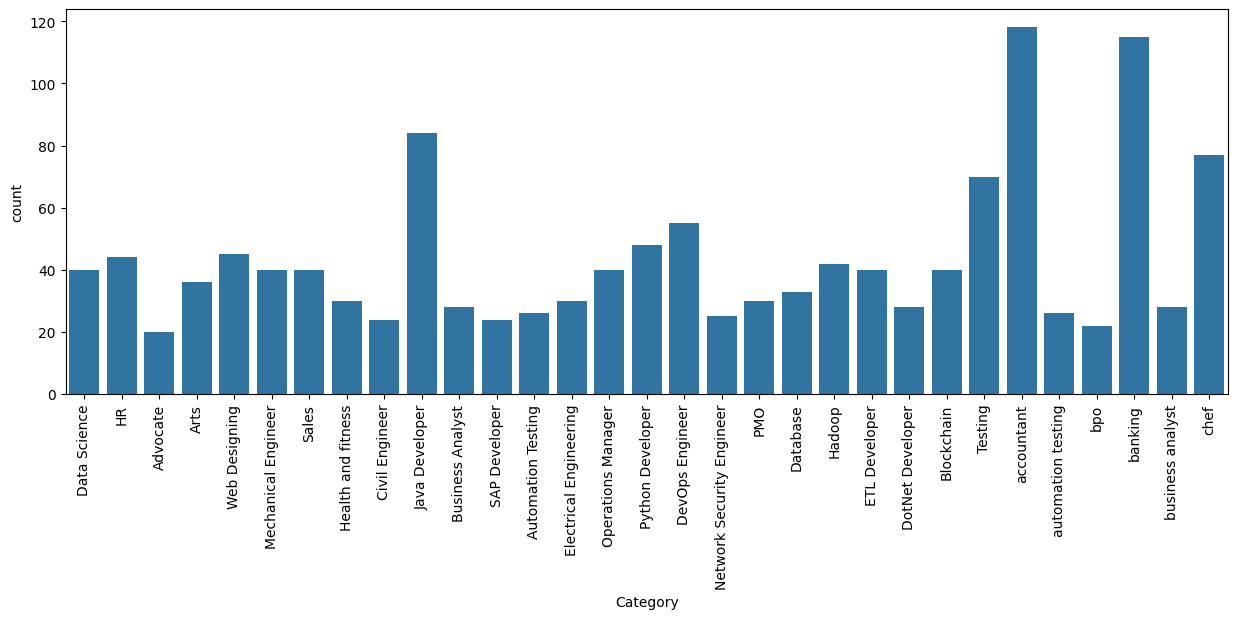

In [8]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.countplot(x="Category", data=df)

# **4. Removing redundant job categories**

In [9]:
df['Category'] = df['Category'].str.lower().str.replace('_', ' ')
df.drop_duplicates(inplace=True)
df

,Category,Resume
0,data science,Skills * Programming Languages: Python (pandas...
1,data science,Education Details \r\nMay 2013 to May 2017 B.E...
2,data science,"Areas of Interest Deep Learning, Control Syste..."
3,data science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,data science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
1343,chef,head chef summary mature college student inter...
1344,chef,executive chef summary outgoing job title offe...
1345,chef,chef assistant core qualifications ms word adv...
1346,chef,executive chef executive profile seeking an op...


<Axes: xlabel='Category', ylabel='count'>

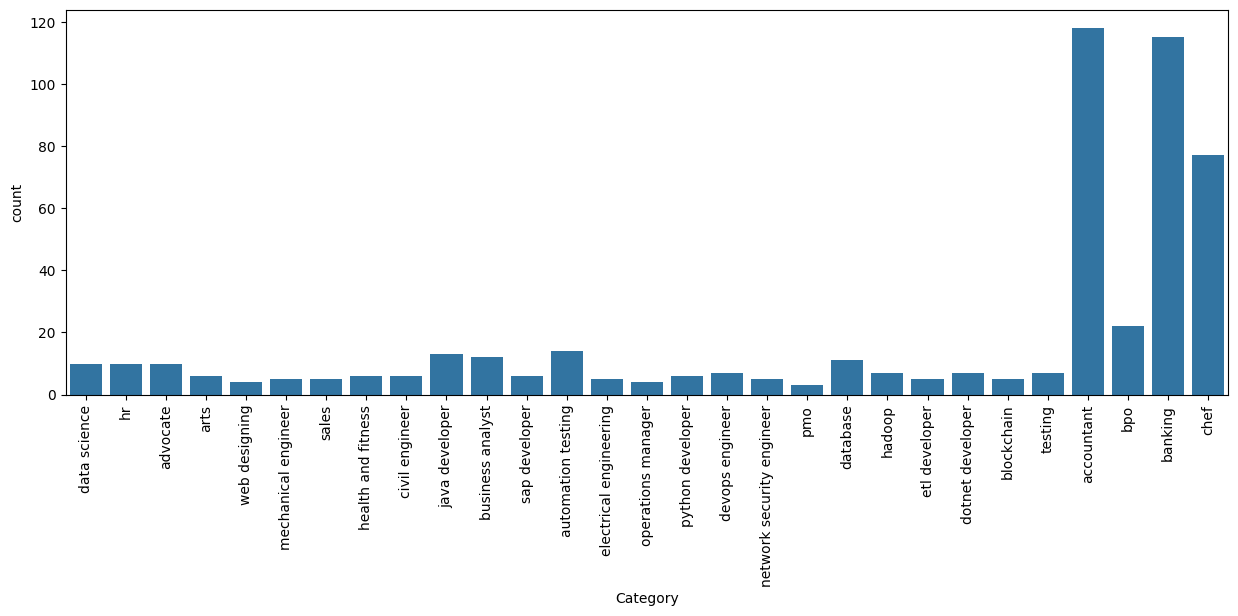

In [10]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.countplot(x="Category", data=df)

In [11]:
df['Category'] = df['Category'].replace({'automation testing': 'testing'})
df['Category'] = df['Category'].replace({'database': 'database administrator'})
df['Category'] = df['Category'].replace({'construction': 'civil engineer'})
df['Category'] = df['Category'].replace({'bpo': 'business analyst'})
df['Category'] = df['Category'].replace({'data science': 'python developer'})
df['Category'] = df['Category'].replace({'operations manager': 'devops engineer'})
df['Category'] = df['Category'].replace({'devops engineer' : 'systems administrator'})
df['Category'] = df['Category'].replace({'accountant': 'banking'})
df['Category'] = df['Category'].replace({'dotnet developer': 'web developer'})
df['Category'] = df['Category'].replace({'web designing': 'web developer'})
df['Category'] = df['Category'].replace({'electrical engineering': 'engineer'})
df['Category'] = df['Category'].replace({'mechanical engineer': 'engineer'})
df['Category'] = df['Category'].replace({'civil engineer': 'engineer'})
df['Category'] = df['Category'].replace({'engineering': 'engineer'})
df['Category'] = df['Category'].replace({'etl developer': 'java developer'})
df['Category'] = df['Category'].replace({'hadoop': 'java developer'})
df['Category'] = df['Category'].replace({'health and fitness': 'healthcare'})
df['Category'] = df['Category'].replace({'network security engineer': 'security analyst'})
df['Category'] = df['Category'].replace({'information technology': 'software developer'})
df['Category'] = df['Category'].replace({'sap developer': 'software developer'})
df['Category'] = df['Category'].replace({'blockchain': 'software developer'})
df['Category'] = df['Category'].replace({'pmo': 'project manager'})
df['Category'] = df['Category'].replace({'business analyst': 'project manager'})
df['Category'] = df['Category'].replace({'digital media': 'arts'})
df['Category'] = df['Category'].replace({'chef': 'arts'})
df['Category'] = df['Category'].replace({'advocate': 'arts'})
df['Category'] = df['Category'].replace({'teacher': 'arts'})
df['Category'] = df['Category'].replace({'healthcare': 'arts'})
df['Category'] = df['Category'].replace({'hr': 'hr and sales'})
df['Category'] = df['Category'].replace({'sales': 'hr and sales'})
df['Category'] = df['Category'].replace({'testing': 'software developer'})
df['Category'].value_counts()

Category
banking                   233
arts                       99
project manager            37
software developer         32
java developer             25
engineer                   16
python developer           16
hr and sales               15
web developer              11
systems administrator      11
database administrator     11
security analyst            5
Name: count, dtype: int64

<Axes: xlabel='Category', ylabel='count'>

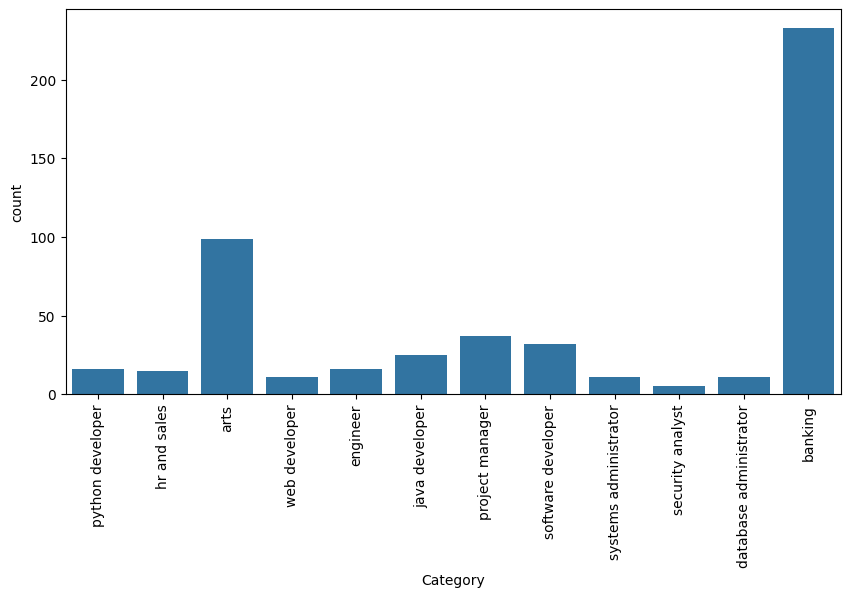

In [12]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(x="Category", data=df)

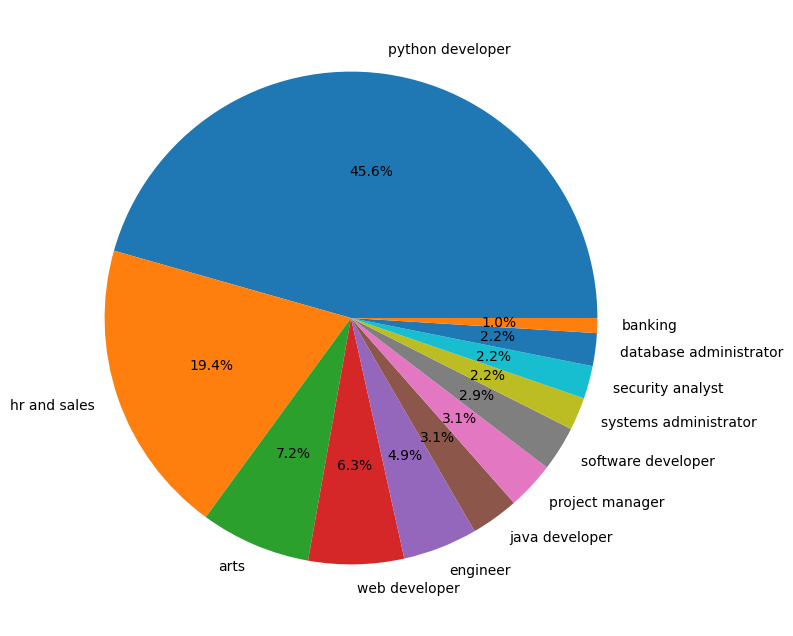

In [13]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(8,8))
plt.pie(counts,labels=labels,autopct='%1.1f%%')
plt.show()

# **5. Cleaning resume data**

In [14]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt) #links
    cleanText = re.sub('#\S+\s', ' ', cleanText) #Hashtags
    cleanText = re.sub('@\S+', '  ', cleanText) #Handles
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText) #Punctuations
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)  #Special Characters
    cleanText = re.sub('\s+', ' ', cleanText) #Extra Whitespaces
    return cleanText

In [15]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in accelerating the

# **6. Label Encoding and Tf-Idf Vectorization**

In [16]:
df['Category'].unique()

array(['python developer', 'hr and sales', 'arts', 'web developer',
       'engineer', 'java developer', 'project manager',
       'software developer', 'systems administrator', 'security analyst',
       'database administrator', 'banking'], dtype=object)

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [ ]:
df['Category'].unique()

array([ 1,  5,  3,  0,  4,  9, 11,  7,  6,  8, 10,  2])

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(df['Resume'])
requiredText  = tfidf.transform(df['Resume'])

# **7. Training the model**

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(requiredText, df['Category'], test_size=0.2)

In [20]:
X_train.shape

(408, 15558)

In [21]:
X_test.shape

(103, 15558)

In [22]:
from sklearn.neighbors import KNeighborsClassifier #KNN Classifier
from sklearn.multiclass import OneVsRestClassifier #Multi-Category Classifier
from sklearn.metrics import accuracy_score #Prediction Score
from sklearn.metrics import classification_report #Prediction Score


clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8349514563106796
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       0.88      0.96      0.92        47
           2       0.75      0.75      0.75         4
           3       1.00      0.80      0.89         5
           4       1.00      0.50      0.67         2
           5       0.80      1.00      0.89         4
           6       0.50      0.25      0.33         8
           7       0.60      1.00      0.75         3
           8       0.50      1.00      0.67         1
           9       0.60      1.00      0.75         3
          10       1.00      0.25      0.40         4
          11       0.75      0.75      0.75         4

    accuracy                           0.83       103
   macro avg       0.78      0.76      0.72       103
weighted avg       0.84      0.83      0.82       103



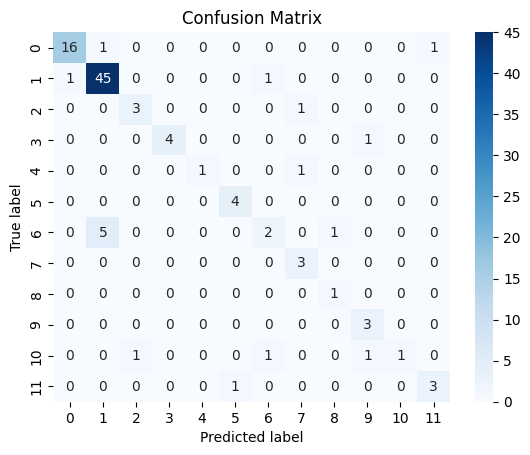

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()


#**8. Resume Parser**



In [25]:
!pip install tika

  Preparing metadata (setup.py) ... done
  Created wheel for tika: filename=tika-2.6.0-py3-none-any.whl size=32621 sha256=143e1bf73375848d2eb34b449e1fbc1c2090c80d9d982e4beac3ac4397ec68bf
  Stored in directory: /root/.cache/pip/wheels/5f/71/c7/b757709531121b1700cffda5b6b0d4aad095fb507ec84316d0
Successfully built tika


In [26]:
from tika import parser
from functools import reduce
import pandas as pd

In [27]:
file = r'software-engineer-resume-example.pdf'
file_data = parser.from_file(file)

2024-04-24 19:03:40,820 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar to /tmp/tika-server.jar.
INFO:tika.tika:Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar to /tmp/tika-server.jar.
2024-04-24 19:03:46,038 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar.md5 to /tmp/tika-server.jar.md5.
INFO:tika.tika:Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar.md5 to /tmp/tika-server.jar.md5.
2024-04-24 19:03:47,302 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


In [28]:
text = file_data['content']
print(text)

































CHARLES MCTURLAND
SOFTWARE ENGINEER

CONTACT
cmcturland@email.com

(123) 456-7890

New York, NY

LinkedIn

EDUCATION
B.S.

Computer Science
University of Pittsburgh

September 2008 - April 2012

Pittsburgh, PA

SKILLS
Python (Django)

Javascript (NodeJS ReactJS,
jQuery)

SQL (MySQL, PostgreSQL,
NoSQL)

HTML5/CSS

AWS

Unix, Git

WORK EXPERIENCE
Software Engineer
Embark
January 2015 - current / New York, NY

Worked with product managers to re-architect a multi-page web
app into a single page web-app, boosting yearly revenue by $1.4M
Constructed the logic for a streamlined ad-serving platform that
scaled to our 35M users, which improved the page speed by 15%
after implementation

Tested software for bugs and operating speed, fixing bugs and
documenting processes to increase efficiency by 18%
Iterated platform for college admissions, collaborating with a group
of 4 engineers to create features across the software

Software Engineer
MarketSmart

April 2012 -

In [29]:
parsed_content = {}

In [30]:
#E-MAIL
import re
def get_email_addresses(string):
    r = re.compile(r'[\w\.-]+@[\w\.-]+')
    return r.findall(string)

email = get_email_addresses(text)
emails = reduce(lambda re, x: re+[x] if x not in re else re, email, [])
print(emails)
parsed_content['E-mail'] = email

['cmcturland@email.com']


In [31]:
#PHONE NUMBER
import re
def get_phone_numbers(string):
    r = re.compile(r'(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4})')
    phone_numbers = r.findall(string)
    return [re.sub(r'\D', '', num) for num in phone_numbers]

phone_number= get_phone_numbers(text)
print(phone_number[0])


1234567890


In [32]:
import spacy
nlp = spacy.load('en_core_web_sm')
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

def extract_name(text):
   nlp_text = nlp(text)

   # First name and Last name are always Proper Nouns
   pattern = [{'POS': 'PROPN'}, {'POS': 'PROPN'}]

   matcher.add('NAME', [pattern], on_match = None)

   matches = matcher(nlp_text)

   for match_id, start, end in matches:
       span = nlp_text[start:end]
       return span.text

name = extract_name(text)
print("Name:", name)
parsed_content['Name'] =  name

Name: CHARLES MCTURLAND


In [33]:
Keywords = ["education",
            "summary",
            "accomplishments",
            "executive profile",
            "professional profile",
            "personal profile",
            "work background",
            "academic profile",
            "other activities",
            "qualifications",
            "experience",
            "interests",
            "skills",
            "achievements",
            "publications",
            "publication",
            "certifications",
            "workshops",
            "project work",
            "internships",
            "trainings",
            "hobbies",
            "overview",
            "objective",
            "position of responsibility",
            "jobs"
           ]

In [34]:
text = text.replace("\n"," ")
text = text.replace("[^a-zA-Z0-9]", " ");
re.sub('\W+','', text)
text = text.lower()
print(text)

                                charles mcturland software engineer  contact cmcturland@email.com  (123) 456-7890  new york, ny  linkedin  education b.s.  computer science university of pittsburgh  september 2008 - april 2012  pittsburgh, pa  skills python (django)  javascript (nodejs reactjs, jquery)  sql (mysql, postgresql, nosql)  html5/css  aws  unix, git  work experience software engineer embark january 2015 - current / new york, ny  worked with product managers to re-architect a multi-page web app into a single page web-app, boosting yearly revenue by $1.4m constructed the logic for a streamlined ad-serving platform that scaled to our 35m users, which improved the page speed by 15% after implementation  tested software for bugs and operating speed, fixing bugs and documenting processes to increase efficiency by 18% iterated platform for college admissions, collaborating with a group of 4 engineers to create features across the software  software engineer marketsmart  april 2012 -

In [35]:
content = {}
indices = []
keys = []
for key in Keywords:
    try:
        content[key] = text[text.index(key) + len(key):]
        indices.append(text.index(key))
        keys.append(key)
    except:
        pass


In [36]:
#Sorting the indices
zipped_lists = zip(indices, keys)
sorted_pairs = sorted(zipped_lists)
sorted_pairs

tuples = zip(*sorted_pairs)
indices, keys = [ list(tuple) for tuple in  tuples]
keys

['education', 'skills', 'experience']

In [37]:
#Keeping the required content and removing the redundant part
content = []
for idx in range(len(indices)):
    if idx != len(indices)-1:
        content.append(text[indices[idx]: indices[idx+1]])
    else:
        content.append(text[indices[idx]: ])

In [38]:
for i in range(len(indices)):
    parsed_content[keys[i]] = content[i]

In [41]:
parsed_content['ImpData'] = parsed_content['education']+parsed_content['experience']+parsed_content['skills']

In [42]:
print(parsed_content['ImpData'])

education b.s.  computer science university of pittsburgh  september 2008 - april 2012  pittsburgh, pa  experience software engineer embark january 2015 - current / new york, ny  worked with product managers to re-architect a multi-page web app into a single page web-app, boosting yearly revenue by $1.4m constructed the logic for a streamlined ad-serving platform that scaled to our 35m users, which improved the page speed by 15% after implementation  tested software for bugs and operating speed, fixing bugs and documenting processes to increase efficiency by 18% iterated platform for college admissions, collaborating with a group of 4 engineers to create features across the software  software engineer marketsmart  april 2012 - january 2015 / washington, dc built restful apis that served data to the javascript front-end based on dynamically chosen user inputs that handled over 500,000 concurrent users  built internal tool using nodejs and pupeteer.js to automate qa and monitoring of don

# **9. Prediction System**

In [43]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))

In [44]:
import re
def clean_resume(resume_text):
    clean_text = re.sub('http\S+\s*', ' ', resume_text)
    clean_text = re.sub('RT|cc', ' ', clean_text)
    clean_text = re.sub('#\S+', '', clean_text)
    clean_text = re.sub('@\S+', '  ', clean_text)
    clean_text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', clean_text)
    clean_text = re.sub(r'[^\x00-\x7f]', r' ', clean_text)
    clean_text = re.sub('\s+', ' ', clean_text)
    return clean_text

In [45]:
input_data = cleanResume(parsed_content['ImpData'])
input_features = tfidf.transform([input_data])
prediction_id = clf.predict(input_features)[0]

In [46]:
import pickle

clf = pickle.load(open('clf.pkl', 'rb'))

cleaned_resume = cleanResume(parsed_content['ImpData'])

input_features = tfidf.transform([cleaned_resume])

prediction_id = clf.predict(input_features)[0]

category_mapping = {
     0:"arts",
     3:"engineer",
     4:"hr and sales",
     10:"systems administrator",
     1:"banking",
     2:"database administrator",
     7:"python developer",
     5:"java developer",
     9:"software developer",
     6:"project manager",
     11:"web developer",
     8:"security analyst",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)

Predicted Category: web developer
